Development Phase of the Project

In [12]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

# Libraries for vectorization and topic modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Load the dataset
df = pd.read_excel('/content/Data.xlsx')

# Function to clean text
def clean_text(text):
    # Remove URLs and special characters
    text = re.sub(r'http\S+|https\S+|www\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)

    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()

    # Tokenize and remove stopwords, then lemmatize
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply cleaning to the text column
df['cleaned_text'] = df['Text'].apply(lambda x: clean_text(str(x)))

# Check cleaned text
df[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,"The mouth says, ""How do I love thee, let me co...",mouth say love thee let count waysbr like appl...
1,Arrived slightly thawed. My parents wouldn't a...,arrived slightly thawed parent wouldnt accept ...
2,The crust on these tarts are perfect. My husb...,crust tart perfect husband love im crazy sourt...
3,These are absolutely scrumptuous! My husband ...,absolutely scrumptuous husband love however an...
4,What a nice alternative to an apple pie. Love ...,nice alternative apple pie love fact slicing d...


In [14]:
# Bag of Words Vectorization
bow_vectorizer = CountVectorizer(max_features=1000)
bow_vectors = bow_vectorizer.fit_transform(df['cleaned_text'])
bow_df = pd.DataFrame(bow_vectors.toarray(), columns=bow_vectorizer.get_feature_names_out())

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['cleaned_text'])
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


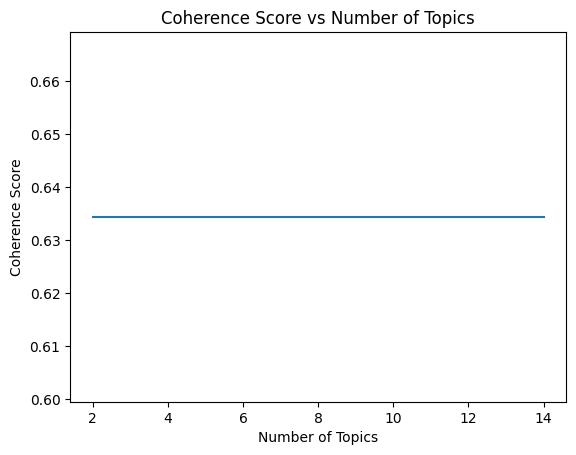

In [15]:
# Prepare data for Gensim Coherence Model
texts = [text.split() for text in df['cleaned_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Function to calculate coherence scores
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        model.fit(bow_vectors)
        topics = [[word for word in bow_vectorizer.get_feature_names_out()]]
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return coherence_values

# Compute coherence scores for topic numbers from 2 to 15
start, limit, step = 2, 15, 1
coherence_values = compute_coherence_values(dictionary, corpus, texts, start, limit, step)

# Plot coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      208 non-null    int64  
 1   ProductId               208 non-null    object 
 2   UserId                  208 non-null    object 
 3   ProfileName             208 non-null    object 
 4   HelpfulnessNumerator    208 non-null    int64  
 5   HelpfulnessDenominator  208 non-null    int64  
 6   Score                   208 non-null    int64  
 7   Time                    208 non-null    int64  
 8   Summary                 208 non-null    object 
 9   Text                    208 non-null    object 
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             0 non-null      float64
 12  x                       0 non-null      float64
 13  cleaned_text            208 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory 

In [17]:
# Checking the data types and missing values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      208 non-null    int64  
 1   ProductId               208 non-null    object 
 2   UserId                  208 non-null    object 
 3   ProfileName             208 non-null    object 
 4   HelpfulnessNumerator    208 non-null    int64  
 5   HelpfulnessDenominator  208 non-null    int64  
 6   Score                   208 non-null    int64  
 7   Time                    208 non-null    int64  
 8   Summary                 208 non-null    object 
 9   Text                    208 non-null    object 
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             0 non-null      float64
 12  x                       0 non-null      float64
 13  cleaned_text            208 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory 

 Exploratory Data Analysis (EDA)
You can begin by exploring the dataset visually to get a better sense of patterns and distributions.

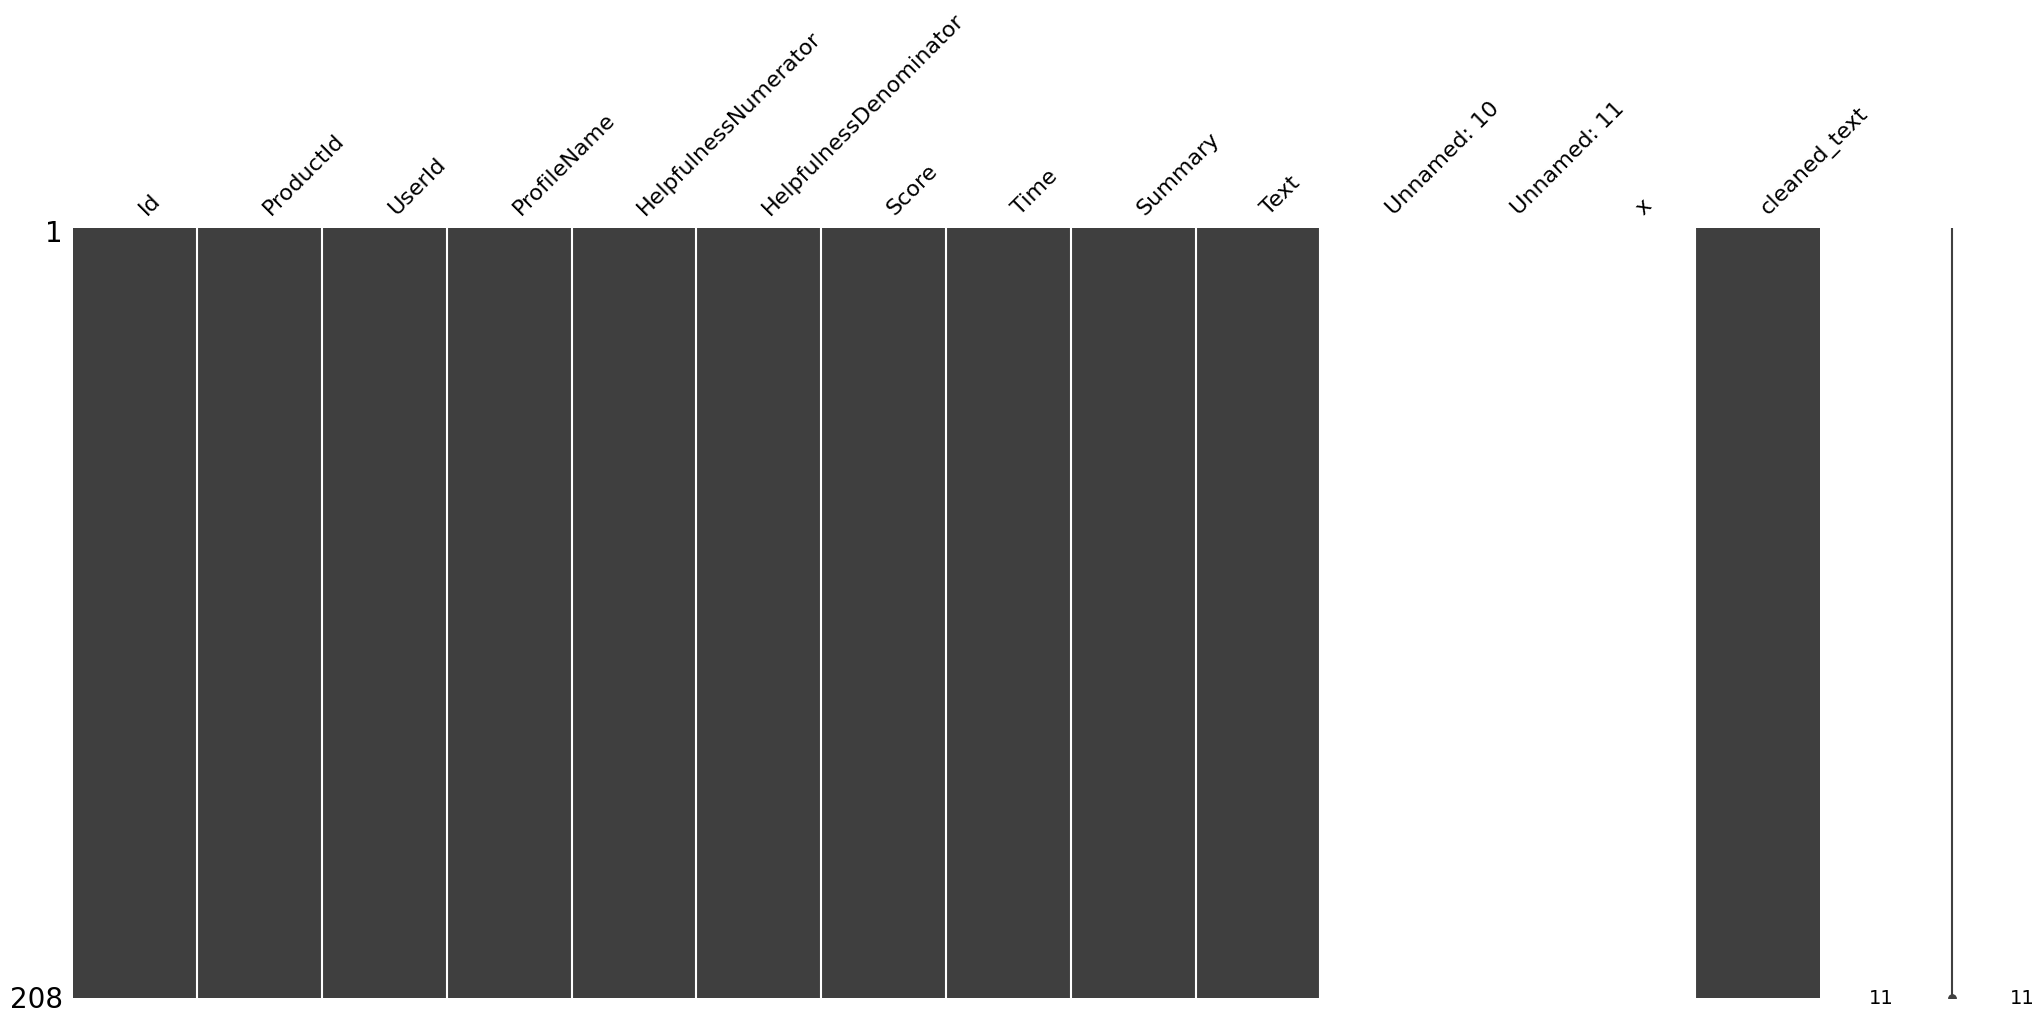

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [18]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values in the dataset
msno.matrix(df)
plt.show()

# Check for missing data summary
df.isnull().sum()


Distribution of Review Scores:

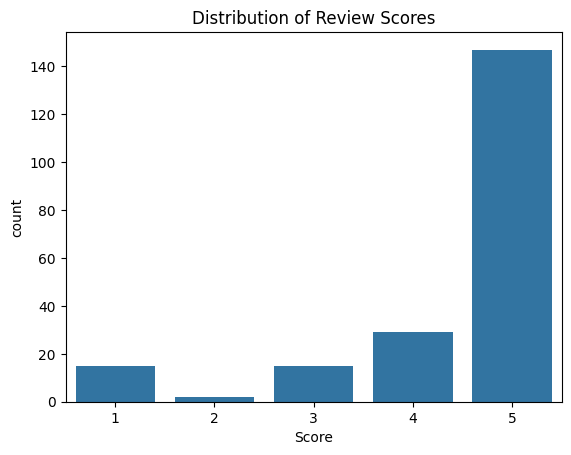

In [19]:
import seaborn as sns

# Plot the distribution of the scores
sns.countplot(x='Score', data=df)
plt.title("Distribution of Review Scores")
plt.show()


 Sentiment Analysis
apply sentiment analysis on the review text to determine whether the reviews are positive, negative, or neutral. This can help better understand customer sentiment.

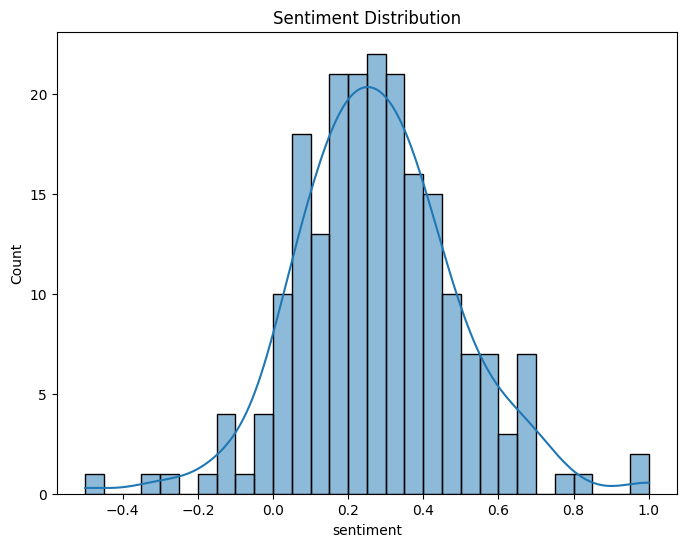

In [20]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'Text' column
df['sentiment'] = df['Text'].apply(get_sentiment)

# Check the sentiment column
df[['Text', 'sentiment']].head()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()


 Word Cloud for Visualization
Generate a word cloud to visualize the most common words in the reviews. This is an intuitive way to understand key themes in the text.

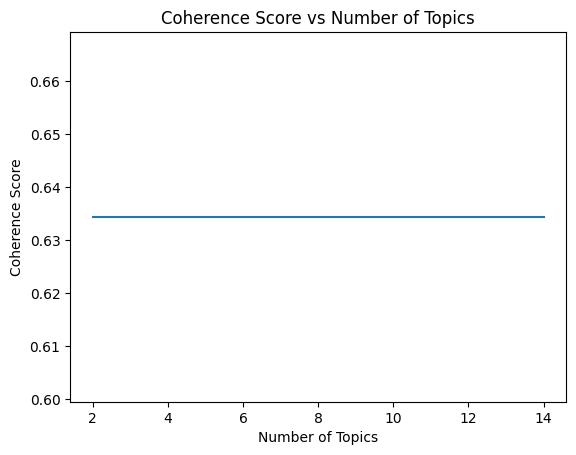

In [21]:
# Prepare data for Gensim Coherence Model
texts = [text.split() for text in df['cleaned_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Function to calculate coherence scores
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
        model.fit(bow_vectors)
        topics = [[word for word in bow_vectorizer.get_feature_names_out()]]
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return coherence_values

# Compute coherence scores for topic numbers from 2 to 15
start, limit, step = 2, 15, 1
coherence_values = compute_coherence_values(dictionary, corpus, texts, start, limit, step)

# Plot coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.show()


In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

# Initialize the CountVectorizer with max_df and min_df parameters
bow_vectorizer = CountVectorizer(max_features=1000, max_df=0.95, min_df=2)
bow_vectors = bow_vectorizer.fit_transform(df['cleaned_text'])

# Set the optimal number of topics based on the coherence plot
optimal_topics = coherence_values.index(max(coherence_values)) + start

# LDA Model with optimized parameters
lda_model = LatentDirichletAllocation(n_components=optimal_topics, random_state=42)
lda_model.fit(bow_vectors)

# Function to display LDA topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display LDA Topics
no_top_words = 10
display_topics(lda_model, bow_vectorizer.get_feature_names_out(), no_top_words)

# NMF Model with TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=2)
tfidf_vectors = tfidf_vectorizer.fit_transform(df['cleaned_text'])
nmf_model = NMF(n_components=optimal_topics, random_state=42)
nmf_model.fit(tfidf_vectors)

# Display NMF Topics
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), no_top_words)


Topic 1:
food sauce br cat chicken one diet science sweet bottle
Topic 2:
coffee like taste good flavor great one love strong ive
Topic 1:
coffee strong like taste caribou mahogany bold dark cup flavor
Topic 2:
sauce sweet chicken great good food love spicy br use
